In [1]:
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
#We will remove gb and kg from Ram and Weight
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [8]:
#after replacing we had now recieved the column with only numbers but still those columns are object so now we will convert this object data to integer and float
df['Ram'] = df['Ram'].astype('int64')
df['Weight'] = df['Weight'].astype('float64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


<AxesSubplot:xlabel='Price', ylabel='Density'>

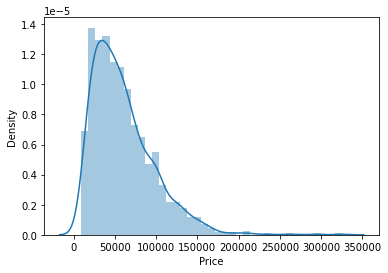

In [10]:
sns.distplot(df['Price'])

From this, we came to know that our data is right skewed data.


There are many laptops whose price is less whereas there are some laptops whose price is more

<AxesSubplot:>

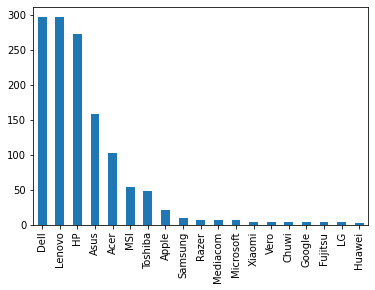

In [11]:
df['Company'].value_counts().plot(kind='bar')

here, we can see there are many laptops of Dell,lenovo,hp,asus,acer,msi,toshiba,apple,samsung.

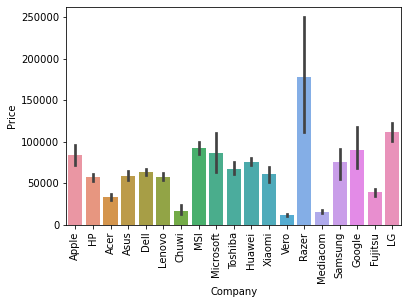

In [12]:
#we will check what is the cost of brands by visualising data
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')#will type the names of brand vertially in graph
plt.show()

from this we can see that Razer,LG,MSi,Apple,etc are the most costly laptops

<AxesSubplot:>

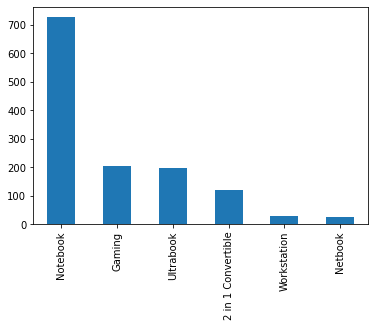

In [13]:
#we will check which kind of laptop people prefers to buy
df['TypeName'].value_counts().plot(kind='bar')

Here we can see that notebook are the most preferred laptops after that Gaming,Ultrabook and so on..


<AxesSubplot:xlabel='Inches', ylabel='Density'>

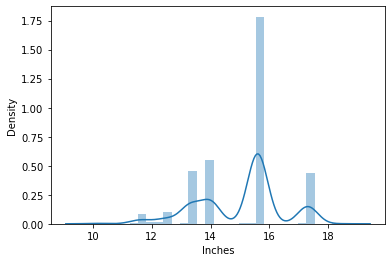

In [14]:
sns.distplot(df['Inches'])

we can see that there are many laptops whose size is about 15inches,14 inches etc


In [15]:
#In ScreenResolution we can see that information is not in a standardized form,there are many laptop with different format of screen resolution

In [16]:
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [17]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [18]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [19]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

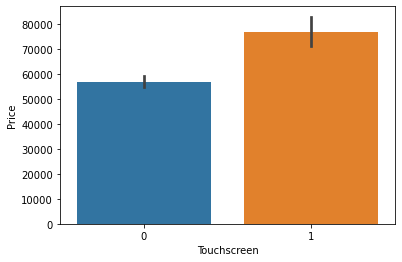

In [20]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

from this we can see that touchscreen laptops have more price.
so we can say that price of laptop is also dependent on type of laptop whether it is a touchscreen or not.

<AxesSubplot:xlabel='Ips', ylabel='Price'>

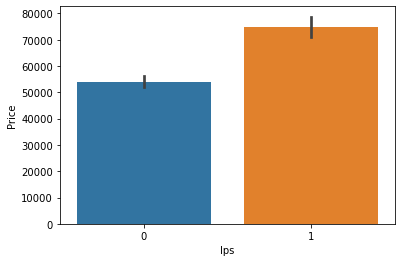

In [21]:
sns.barplot(x=df['Ips'],y=df['Price'])

from this we can see that laptops with Ips display have more price.
so we can say that price of laptop is also dependent on type of laptop display whether it is a Ips or not.

In [22]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [23]:
df['X_res'] = new[0]#1st value i.e. value at 0 index is stored x_res
df['Y_res'] = new[1]#2st value i.e. value at 1 index is stored y_res

In [24]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [25]:
#using regular expression to find the pattern 
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 152.8+ KB


In [28]:
#converting object type into int
df['X_res'] = df['X_res'].astype('int64')
df['Y_res'] = df['Y_res'].astype('int64')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [30]:
df.corr()

,Inches,Ram,Weight,Price,Touchscreen,Ips,X_res,Y_res
Inches,1.000000,0.237993,0.827631,0.068197,-0.361735,-0.114804,-0.071245,-0.095404
Ram,0.237993,1.000000,0.383874,0.743007,0.116984,0.206623,0.433121,0.424437
Weight,0.827631,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.032880,-0.053846
Price,0.068197,0.743007,0.210370,1.000000,0.191226,0.252208,0.556529,0.552809
Touchscreen,-0.361735,0.116984,-0.294620,0.191226,1.000000,0.150512,0.351066,0.357930
Ips,-0.114804,0.206623,0.016967,0.252208,0.150512,1.000000,0.281457,0.289030
X_res,-0.071245,0.433121,-0.032880,0.556529,0.351066,0.281457,1.000000,0.994219
Y_res,-0.095404,0.424437,-0.053846,0.552809,0.357930,0.289030,0.994219,1.000000


we have a strong correlation of x_res and y_res i.e. as the resolution increases price also increase.

In [31]:
#pixels per inches formula 
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [32]:
df.corr()

,Inches,Ram,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
Inches,1.000000,0.237993,0.827631,0.068197,-0.361735,-0.114804,-0.071245,-0.095404,-0.414804
Ram,0.237993,1.000000,0.383874,0.743007,0.116984,0.206623,0.433121,0.424437,0.303763
Weight,0.827631,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.032880,-0.053846,-0.323240
Price,0.068197,0.743007,0.210370,1.000000,0.191226,0.252208,0.556529,0.552809,0.473487
Touchscreen,-0.361735,0.116984,-0.294620,0.191226,1.000000,0.150512,0.351066,0.357930,0.460587
Ips,-0.114804,0.206623,0.016967,0.252208,0.150512,1.000000,0.281457,0.289030,0.300879
X_res,-0.071245,0.433121,-0.032880,0.556529,0.351066,0.281457,1.000000,0.994219,0.931217
Y_res,-0.095404,0.424437,-0.053846,0.552809,0.357930,0.289030,0.994219,1.000000,0.939363
ppi,-0.414804,0.303763,-0.323240,0.473487,0.460587,0.300879,0.931217,0.939363,1.000000


here we can see that there is a strong correlation of ppi with price

In [33]:
df.drop(columns=['ScreenResolution'],inplace=True)#dropping ScreenResolution as we have all the hidden information in a desired format

In [34]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [35]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)#we will also drop inches xres and yres as we have included all 3 in ppi

In [36]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [37]:
#we will perform the same process as screenresolution so that we can get all the important hidden data in cpu
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [38]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [39]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [40]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [41]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [42]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


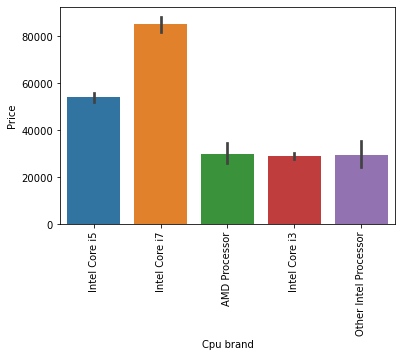

In [43]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

we can see intel corei7 starts with 80k and  is costly after that intel core i5 starts with 5k and is also costly and similarly others...

In [44]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [45]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


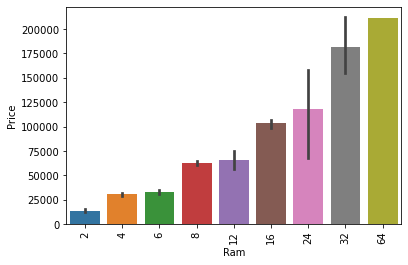

In [46]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

as the ram size increases price also increses so we can say that ram is in linear relationship with price

In [47]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)


In [48]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()

In [49]:
df["second"]= new[1]

In [50]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128 SSD,None
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,512 SSD,None
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,64 Flash Storage,None
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000 HDD,None


In [51]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [52]:
df['first'] = df['first'].str.replace(r'\D', '')
df["second"].fillna("0", inplace = True)

In [53]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128,0,0,1,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,512,0,0,1,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,64,0,0,0,0,1
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,1,0,0,0


In [54]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [55]:
df['second'] = df['second'].str.replace(r'\D', '')

In [56]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,...,128,0,0,1,0,0,0,0,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,...,512,0,0,1,0,0,0,0,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,...,64,0,0,0,0,1,0,0,0,0
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,...,1000,0,1,0,0,0,0,0,0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Ram                  1303 non-null   int64  
 3   Memory               1303 non-null   object 
 4   Gpu                  1303 non-null   object 
 5   OpSys                1303 non-null   object 
 6   Weight               1303 non-null   float64
 7   Price                1303 non-null   float64
 8   Touchscreen          1303 non-null   int64  
 9   Ips                  1303 non-null   int64  
 10  ppi                  1303 non-null   float64
 11  Cpu brand            1303 non-null   object 
 12  first                1303 non-null   object 
 13  second               1303 non-null   object 
 14  Layer1HDD            1303 non-null   int64  
 15  Layer1SSD            1303 non-null   i

In [58]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [59]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])


In [60]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid','Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

In [61]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0


In [62]:
df.drop(columns=['Memory'],inplace=True)

In [63]:
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0


In [64]:
df.corr()

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage
Ram,1.000000,0.383874,0.743007,0.116984,0.206623,0.303763,0.096288,0.603634,0.038461,-0.060177
Weight,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.323240,0.514491,-0.062742,0.095155,-0.179916
Price,0.743007,0.210370,1.000000,0.191226,0.252208,0.473487,-0.096441,0.670799,0.007989,-0.040511
Touchscreen,0.116984,-0.294620,0.191226,1.000000,0.150512,0.460587,-0.209733,0.255092,-0.039679,-0.019080
Ips,0.206623,0.016967,0.252208,0.150512,1.000000,0.300879,-0.094461,0.223795,-0.022601,0.069643
ppi,0.303763,-0.323240,0.473487,0.460587,0.300879,1.000000,-0.295411,0.506895,-0.020212,0.077753
HDD,0.096288,0.514491,-0.096441,-0.209733,-0.094461,-0.295411,1.000000,-0.399896,-0.076596,-0.117658
SSD,0.603634,-0.062742,0.670799,0.255092,0.223795,0.506895,-0.399896,1.000000,-0.059750,-0.147991
Hybrid,0.038461,0.095155,0.007989,-0.039679,-0.022601,-0.020212,-0.076596,-0.059750,1.000000,-0.014368
Flash_Storage,-0.060177,-0.179916,-0.040511,-0.019080,0.069643,0.077753,-0.117658,-0.147991,-0.014368,1.000000


In [65]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [66]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [67]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [68]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [69]:
#since there is only 1 ARM we will delete this row
df.loc[df['Gpu brand']=="ARM"]

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,234.5074,AMD Processor,0,0,0,32,ARM


In [70]:
df.drop(index=[1191], inplace=True)

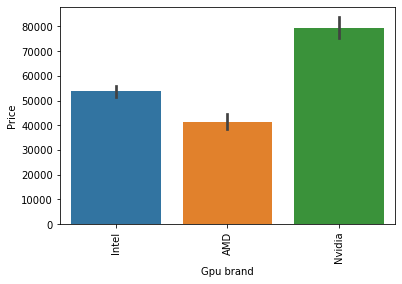

In [71]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

we can see gpu brand is also an important for price prediction

In [72]:
df.drop(columns=['Gpu'],inplace=True)

In [73]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [74]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

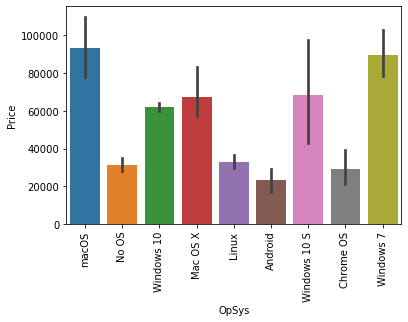

In [75]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [76]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Linux'

In [77]:
df['os'] = df['OpSys'].apply(cat_os)

In [78]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


In [79]:
df.drop(columns=['OpSys'],inplace=True)

In [80]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


In [81]:
#splitting numeric data and categorical data
df_num= df.select_dtypes(['float64','int64'])
df_num

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage
0,8,1.37,71378.6832,0,1,226.983005,0,128,0,0
1,8,1.34,47895.5232,0,0,127.677940,0,0,0,128
2,8,1.86,30636.0000,0,0,141.211998,0,256,0,0
3,16,1.83,135195.3360,0,1,220.534624,0,512,0,0
4,8,1.37,96095.8080,0,1,226.983005,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,33992.6400,1,1,157.350512,0,128,0,0
1299,16,1.30,79866.7200,1,1,276.053530,0,512,0,0
1300,2,1.50,12201.1200,0,0,111.935204,0,0,0,64
1301,6,2.19,40705.9200,0,0,100.454670,1000,0,0,0


In [82]:
df_cat= df.select_dtypes('object')
df_cat

,Company,TypeName,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,Intel Core i5,Intel,Mac
2,HP,Notebook,Intel Core i5,Intel,Linux
3,Apple,Ultrabook,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,Intel Core i5,Intel,Mac
...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7,Intel,Windows
1299,Lenovo,2 in 1 Convertible,Intel Core i7,Intel,Windows
1300,Lenovo,Notebook,Other Intel Processor,Intel,Windows
1301,HP,Notebook,Intel Core i7,AMD,Windows


In [83]:
# so now we will perform label encoding on categorical data so that we can convert all the categorical data into numeric data so that we can train our model

In [84]:
from sklearn.preprocessing import LabelEncoder
for i in df_cat:
    le=LabelEncoder()
    df_cat[i]=le.fit_transform(df_cat[i])

In [85]:
df_cat

,Company,TypeName,Cpu brand,Gpu brand,os
0,1,4,2,1,1
1,1,4,2,1,1
2,7,3,2,1,0
3,1,4,3,0,1
4,1,4,2,1,1
...,...,...,...,...,...
1298,10,0,3,1,2
1299,10,0,3,1,2
1300,10,3,4,1,2
1301,7,3,3,0,2


In [86]:
#concatenate of df_num and df_cat so that we can regain our original data
df2=pd.concat([df_num,df_cat],axis=1)
df2

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage,Company,TypeName,Cpu brand,Gpu brand,os
0,8,1.37,71378.6832,0,1,226.983005,0,128,0,0,1,4,2,1,1
1,8,1.34,47895.5232,0,0,127.677940,0,0,0,128,1,4,2,1,1
2,8,1.86,30636.0000,0,0,141.211998,0,256,0,0,7,3,2,1,0
3,16,1.83,135195.3360,0,1,220.534624,0,512,0,0,1,4,3,0,1
4,8,1.37,96095.8080,0,1,226.983005,0,256,0,0,1,4,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,33992.6400,1,1,157.350512,0,128,0,0,10,0,3,1,2
1299,16,1.30,79866.7200,1,1,276.053530,0,512,0,0,10,0,3,1,2
1300,2,1.50,12201.1200,0,0,111.935204,0,0,0,64,10,3,4,1,2
1301,6,2.19,40705.9200,0,0,100.454670,1000,0,0,0,7,3,3,0,2


In [87]:
#Splitting data into x and y
x=df2[["Ram","Weight","Touchscreen","Ips","ppi","HDD","SSD","Hybrid","Flash_Storage","Company","TypeName","Cpu brand","Gpu brand","os"]]
x

,Ram,Weight,Touchscreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage,Company,TypeName,Cpu brand,Gpu brand,os
0,8,1.37,0,1,226.983005,0,128,0,0,1,4,2,1,1
1,8,1.34,0,0,127.677940,0,0,0,128,1,4,2,1,1
2,8,1.86,0,0,141.211998,0,256,0,0,7,3,2,1,0
3,16,1.83,0,1,220.534624,0,512,0,0,1,4,3,0,1
4,8,1.37,0,1,226.983005,0,256,0,0,1,4,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.350512,0,128,0,0,10,0,3,1,2
1299,16,1.30,1,1,276.053530,0,512,0,0,10,0,3,1,2
1300,2,1.50,0,0,111.935204,0,0,0,64,10,3,4,1,2
1301,6,2.19,0,0,100.454670,1000,0,0,0,7,3,3,0,2


In [88]:
y=df2["Price"]
y

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1302, dtype: float64

In [89]:
#Splitting data into training and testing data

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.20, random_state=1)

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [91]:
def buildmodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(f"MAE = {mean_absolute_error(ytest,ypred)}")
    print(f"MSE = {mean_squared_error(ytest,ypred)}")
    print(f"RMSE = {np.sqrt(mean_absolute_error(ytest,ypred))}")
    print(f"Accuracy= {round((r2_score(ytest,ypred)*100),2)}%")

In [92]:
lr=LinearRegression()
kn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
svm=SVR()

In [93]:
buildmodel(lr)

MAE = 15817.063861201439
MSE = 455974901.5424243
RMSE = 125.76590897855205
Accuracy= 68.31%


In [94]:
buildmodel(kn)

MAE = 15207.656507586207
MSE = 602331828.2620451
RMSE = 123.31932738863851
Accuracy= 58.14%


In [95]:
buildmodel(dt)

MAE = 13351.48504367816
MSE = 559682179.7561964
RMSE = 115.54862631670773
Accuracy= 61.1%


In [96]:
buildmodel(svm)

MAE = 28370.41911197994
MSE = 1582167223.0726287
RMSE = 168.43520745966367
Accuracy= -9.96%


In [101]:
for i in range(1,50):
    dt1=DecisionTreeRegressor(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    print(f"{i}:{r2_score(ytest,ypred)}")


1:0.38747492428526964
2:0.6211785086887573
3:0.615068459918553
4:0.6418527382342593
5:0.6209722433516719
6:0.6418670325772016
7:0.5993304190321045
8:0.6100276775055793
9:0.611745664586833
10:0.593492909145487
11:0.6141038701157178
12:0.6048745236283382
13:0.6129925961892513
14:0.6050386852821661
15:0.6189078535892498
16:0.5947817117998875
17:0.5949964018575302
18:0.5852169163660654
19:0.6472041716080137
20:0.5957737982076563
21:0.6059789435654608
22:0.6327306469023957
23:0.6290272745648608
24:0.6580155214886448
25:0.6146115979042466
26:0.6159610451235038
27:0.6378976002951532
28:0.627630981306902
29:0.5885146648138371
30:0.6126768979214179
31:0.6104106975673416
32:0.6008305394208302
33:0.5932006660197043
34:0.6123092283275345
35:0.5953488895068504
36:0.5914699950512698
37:0.5913542144197956
38:0.603076423785331
39:0.6279767430811397
40:0.6437860361848637
41:0.5984945781197533
42:0.6356256426703528
43:0.6035471848592373
44:0.651906284174927
45:0.6278433265168271
46:0.6112379588605359
47

In [102]:
dt2=DecisionTreeRegressor(max_depth=6)
buildmodel(dt2)

MAE = 14796.190061543462
MSE = 572173782.3269721
RMSE = 121.63959084748461
Accuracy= 60.23%


In [105]:
for i in range(1,50):
    dt3=DecisionTreeRegressor(min_samples_leaf=i)
    dt3.fit(xtrain,ytrain)
    ypred=dt3.predict(xtest)
    print(f"{i}:{r2_score(ytest,ypred)}")


1:0.6144215549050488
2:0.7110091410609257
3:0.753954788596567
4:0.7500638622070246
5:0.753396722187685
6:0.7943878095418605
7:0.7486135006090393
8:0.7359867699842068
9:0.7402041236382191
10:0.74511627047301
11:0.7429520797902132
12:0.7694394209931695
13:0.752157146138921
14:0.7554975517823199
15:0.7470997747706286
16:0.7471816678449582
17:0.6775925326882731
18:0.6897850956952766
19:0.6955826911910978
20:0.6995835070907801
21:0.7062644473351056
22:0.7065401669899625
23:0.706600137502075
24:0.7094018919235848
25:0.7074185922172653
26:0.7051093144673841
27:0.7075736796002892
28:0.6935873969782058
29:0.6951936137617891
30:0.7015682393720424
31:0.7028665129794323
32:0.7033889445754902
33:0.7059433227720897
34:0.7059433227720897
35:0.7061994046232554
36:0.7007841377197312
37:0.7007841377197312
38:0.6969541909317125
39:0.6963778253812707
40:0.6773318678431339
41:0.6779267242573808
42:0.6770908713047343
43:0.6770908713047343
44:0.6757036070013724
45:0.6757036070013726
46:0.6783438809256703
47:

In [106]:
dt4=DecisionTreeRegressor(min_samples_leaf=6)
buildmodel(dt4)

MAE = 11890.865897553327
MSE = 295846680.0395939
RMSE = 109.04524701954381
Accuracy= 79.44%


In [109]:
for i in range(49,100):
    dt5=DecisionTreeRegressor(min_samples_split=i)
    dt5.fit(xtrain,ytrain)
    ypred=dt5.predict(xtest)
    print(f"{i}:{r2_score(ytest,ypred)}")

49:0.7141141242115336
50:0.7141119954117989
51:0.7141119954117989
52:0.7141119954117989
53:0.7150077496929307
54:0.7148887231305487
55:0.7141318547348849
56:0.7141318547348849
57:0.7141863048588206
58:0.7141863048588206
59:0.7168985563013699
60:0.714815645377366
61:0.7112619454008835
62:0.7130170120729751
63:0.7131322525213886
64:0.7121586372135893
65:0.7121586372135893
66:0.7121586372135893
67:0.7121586372135893
68:0.7121586372135893
69:0.7121586372135893
70:0.7121586372135893
71:0.7121586372135893
72:0.7115506115154232
73:0.7099875988690318
74:0.7099875988690318
75:0.7041472356383149
76:0.7037926722166277
77:0.7037926722166277
78:0.7037926722166277
79:0.7037926722166278
80:0.7027794000092313
81:0.7027794000092313
82:0.7027794000092313
83:0.7027794000092313
84:0.7027794000092313
85:0.7023376285523314
86:0.728925655091154
87:0.728925655091154
88:0.7280184919807298
89:0.7280184919807298
90:0.7369803917045715
91:0.7363161910915472
92:0.7361143145083151
93:0.7361143145083151
94:0.73622394

In [110]:
dt6=DecisionTreeRegressor(min_samples_split=59)
buildmodel(dt6)

MAE = 13431.928527199405
MSE = 407342687.4449224
RMSE = 115.89619720767116
Accuracy= 71.69%


In [113]:
models=[]
accuracy=[]
models.append(("logrg",LinearRegression()))
models.append(("dt",DecisionTreeRegressor()))

for name,model in models:
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    accuracy.append(r2_score(ytest,ypred))

In [114]:
accuracy

[0.6830993733391735, 0.6100510571193518]

In [115]:
from sklearn.ensemble import VotingRegressor

In [116]:
models

[('logrg', LinearRegression()), ('dt', DecisionTreeRegressor())]

In [118]:
vc=VotingRegressor(estimators=models)
vc.fit(xtrain,ytrain)
ypred=vc.predict(xtest)
print(r2_score(ytest,ypred))

0.7957506068271444


In [120]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(xtrain,ytrain)
ypred=ad.predict(xtest)
print(r2_score(ytest,ypred))

0.6289119707370427


In [121]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(xtrain,ytrain)
ypred=gb.predict(xtest)
print(r2_score(ytest,ypred))

0.825617249748001


In [122]:
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(xtrain,ytrain)
ypred=xg.predict(xtest)
print(r2_score(ytest,ypred))

0.797086581812827
